### Loading the dataset

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth", 300)

In [2]:
DATA_PATH = "../data/problems_data.jsonl"

df = pd.read_json(DATA_PATH, lines=True)
df.head()

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,"Unununium (Uuu) was the name of the chemical\n element with atom number 111, until it changed to\n Röntgenium (Rg) in 2004. These heavy elements are very\n unstable and have only been synthesized in a few\n laboratories.\nYou have just been hired by one of these labs to optimize\n ...","The input consists of one line with two integers\n $N$ and $M$, the number of vertices and edges\n your graph should have. Apart from the sample, there will be\n only one test case, with $N =\n 100$ and $M =\n 500$.","The output consists of $M$ lines where the $i$:th contains two integers\n $u_ i$ and $v_ i$ ($1 \leq u_ i, v_ i \leq N$). This\n indicates that the vertices $u_\n i$ and $v_ i$ are\n connected with an edge in your graph.","[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 5 6 6 7 5 7 1 7 7 2 5 1'}]",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,"A number of eccentrics from central New York have decided\n that they have had enough of modern society, and want to move\n from there. Together they have bought a rectangular piece of\n land far away, and will now settle there.\nThe land consists of $N \times\n M$ squares, and it is...","The input consists of $10$ test cases, which are described\n below.","Print $K$ lines with\n the positions of the houses. Each line should contain two\n numbers: first the row for the house (between $1$ and $N$), then the column (between\n $1$ and $M$). Two houses may not be placed at\n the same position.","[{'input': '0 2 3 2 50 60 50 30 50 40', 'output': '2 1 1 3'}]",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,"Mario and Luigi are playing a game where they pick distinct\n numbers $M, L$\n ($0 \leq M,L <\n 2^{10^{18}}$). In order to place careful bets on the\n outcome of the game, you wish to know whose number is larger.\n Both Mario and Luigi have already shared their secret numbers\n ...",,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts with a straight\n wire placed on the table with the starting point glued to the\n middle of the table. She then repeatedly picks a point on the\n wire and bends the part starting at that point (away from the\n starting point) by $90$\n de...,"The first line contains two integers $L$ and $n$ where $L$ is the length of the wire and\n $n$ is the number of\n points. Each of the next $n$ lines contains a number from\n $\{ 0,\dots ,L\} $\n (describing the point on the wire) followed by W (clockwise) or C (counter\n clockwise...","The output consists of a single line consisting of the\n string GHOST if the wire would touch itself\n during the bending, and the string SAFE\n otherwise.","[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST'}, {'input': '3 3 1 C 2 C 3 C', 'output': 'SAFE'}]",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, relatively\n loose – he is tied to a post with a leash, limiting his\n movements. Spread around the park are various squeaky toys and\n other dog paraphernalia, which Spot happily goes after when he\n sees them. When he gets to a toy he w...","The first line of input consists of two integers\n $n$ and $m$, where $1 \le n \le 50$ is the number of toys\n in the park and $0 \le m \le\n 50$ is the number of trees in the park. Then follow\n $n$ lines, each containing\n two integers $x$,\n $y$ giving the coordinates\n o...","Write a single line containing the length needed for the\n leash in order for Spot to be able to get to all his toys,\n rounded to two decimal digits.","[{'input': '2 0 10 0 10 10', 'output': '14.14'}, {'input': '2 1 10 0 10 10 9 1', 'output': '18.11'}]",hard,9.6,https://open.kattis.com/problems/barktree


In [3]:
print("Shape:", df.shape)
df.info()

Shape: (4112, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               4112 non-null   object 
 1   description         4112 non-null   object 
 2   input_description   4112 non-null   object 
 3   output_description  4112 non-null   object 
 4   sample_io           4112 non-null   object 
 5   problem_class       4112 non-null   object 
 6   problem_score       4112 non-null   float64
 7   url                 4112 non-null   object 
dtypes: float64(1), object(7)
memory usage: 257.1+ KB


In [4]:
df.isnull().sum()

title                 0
description           0
input_description     0
output_description    0
sample_io             0
problem_class         0
problem_score         0
url                   0
dtype: int64

In [5]:
df["problem_class"].value_counts()

problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64

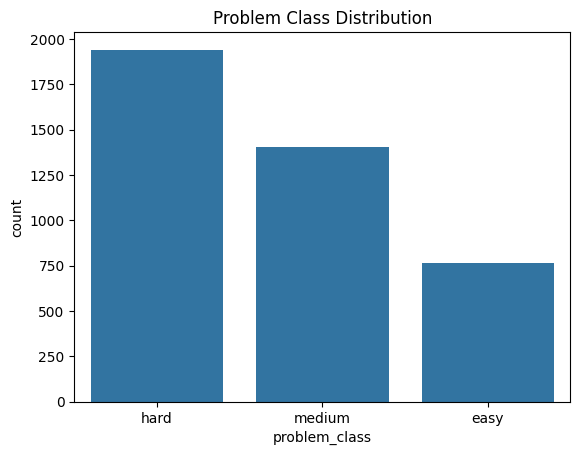

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="problem_class", data=df)
plt.title("Problem Class Distribution")
plt.show()

#### There is slight class imbalance but that is expected from such dataset.

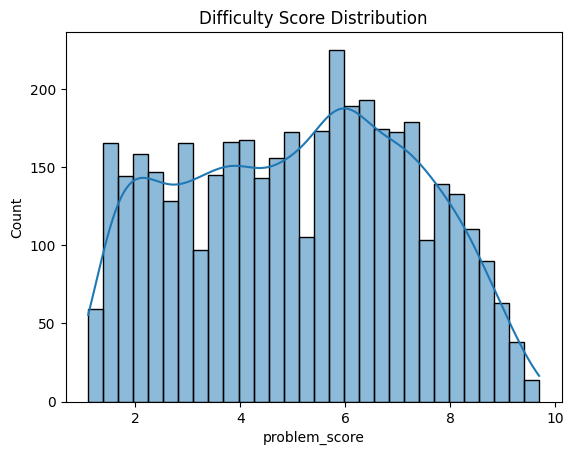

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["problem_score"], bins=30, kde=True)
plt.title("Difficulty Score Distribution")
plt.show()

#### It shows a moderate distribution of data without much skewness.

### Combine Text Fields

In [8]:
def combine_text(row):
    return (
        row["title"] + " " +
        row["description"] + " " +
        row["input_description"] + " " +
        row["output_description"]
    )

df["full_text"] = df.apply(combine_text, axis=1)

In [9]:
df[["title", "full_text"]].head(2)

,title,full_text
0,Uuu,"Uuu Unununium (Uuu) was the name of the chemical\n element with atom number 111, until it changed to\n Röntgenium (Rg) in 2004. These heavy elements are very\n unstable and have only been synthesized in a few\n laboratories.\nYou have just been hired by one of these labs to optimize\..."
1,House Building,"House Building A number of eccentrics from central New York have decided\n that they have had enough of modern society, and want to move\n from there. Together they have bought a rectangular piece of\n land far away, and will now settle there.\nThe land consists of $N \times\n M$ squ..."


### Text Cleaning

In [10]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\t", " ", text)

    # Keep math & programming symbols
    text = re.sub(r"[^a-z0-9+\-*/<>=(){}\[\],.: ]", " ", text)

    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [11]:
df["clean_text"] = df["full_text"].apply(clean_text)

In [12]:
df["clean_text"].iloc[0][:500]

'uuu unununium (uuu) was the name of the chemical element with atom number 111, until it changed to r ntgenium (rg) in 2004. these heavy elements are very unstable and have only been synthesized in a few laboratories. you have just been hired by one of these labs to optimize the algorithms used in simulations. for example, when simulating complicated chemical reactions, it is important to keep track of how many particles there are, and this is done by counting connected components in a graph. cur'

### Target Encoding

In [13]:
y_class = df["problem_class"]
y_score = df["problem_score"]

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

label_encoder.classes_

array(['easy', 'hard', 'medium'], dtype=object)

In [15]:
import numpy as np
np.bincount(y_class_encoded)

array([ 766, 1941, 1405])

## FEATURE ENGINEERING

#### TF-IDF Vectorization (MAIN TEXT REPRESENTATION)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=6000,          # balances signal vs noise
    ngram_range=(1, 2),         # unigrams + bigrams
    min_df=3,                   # ignore very rare words
    stop_words="english",
    sublinear_tf=True           # logarithmic scaling
)

In [17]:
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])
X_tfidf.shape

(4112, 6000)

#### Hand-Crafted Difficulty Features

In [18]:
import numpy as np

def extract_complexity_features(text):
    return [
        len(text),                       # total characters
        len(text.split()),               # total words
        text.count("for"),
        text.count("while"),
        text.count("if"),
        text.count("graph"),
        text.count("tree"),
        text.count("dp"),
        text.count("dynamic programming"),
        text.count("recursion"),
        text.count("backtracking"),
        text.count("binary search"),
        text.count("shortest path"),
        text.count("mod"),
        text.count("%"),
        sum(c.isdigit() for c in text),   # numeric intensity
        text.count("+") + text.count("-") + text.count("*") + text.count("/")
    ]

In [19]:
X_complexity = np.array(
    df["clean_text"].apply(extract_complexity_features).tolist()
)

X_complexity.shape

(4112, 17)

In [20]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

scaler = StandardScaler()
X_complexity_scaled = scaler.fit_transform(X_complexity)
X_complexity_scaled_sparse = csr_matrix(X_complexity_scaled)

#### Feature Fusion (Sparse + Dense)

In [21]:
from scipy.sparse import hstack

X_final = hstack([X_tfidf, X_complexity_scaled_sparse])
X_final.shape

(4112, 6017)

In [22]:
y_class = y_class_encoded     # from previous step
y_score = df["problem_score"].values

#### Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_cls, y_test_cls, y_train_reg, y_test_reg = train_test_split(
    X_final,
    y_class,
    y_score,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

### MODEL 1 — DIFFICULTY CLASSIFICATION

##### Baseline Model: Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    max_iter=2000,
    n_jobs=-1
)

In [25]:
clf.fit(X_train, y_train_cls)

d:\AutoJudge Predicting Programming Problem Difficulty\autojudge_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [26]:
y_pred_cls = clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Classification Accuracy: {accuracy:.4f}")

Classification Accuracy: 0.5200


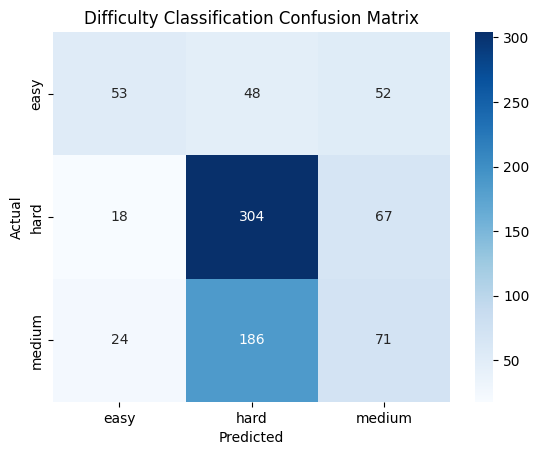

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cls, y_pred_cls)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Difficulty Classification Confusion Matrix")
plt.show()

In [29]:
print(classification_report(
    y_test_cls,
    y_pred_cls,
    target_names=label_encoder.classes_
))

              precision    recall  f1-score   support

        easy       0.56      0.35      0.43       153
        hard       0.57      0.78      0.66       389
      medium       0.37      0.25      0.30       281

    accuracy                           0.52       823
   macro avg       0.50      0.46      0.46       823
weighted avg       0.50      0.52      0.49       823



##### Linear SVM

In [30]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train_cls)

svm_pred = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test_cls, svm_pred))

SVM Accuracy: 0.4945321992709599


d:\AutoJudge Predicting Programming Problem Difficulty\autojudge_env\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


we can also tune it's C-parameter, and the accuracy improves

In [31]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.5)
svm.fit(X_train, y_train_cls)
svm_cpred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test_cls, svm_cpred))

SVM Accuracy: 0.503037667071689


d:\AutoJudge Predicting Programming Problem Difficulty\autojudge_env\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


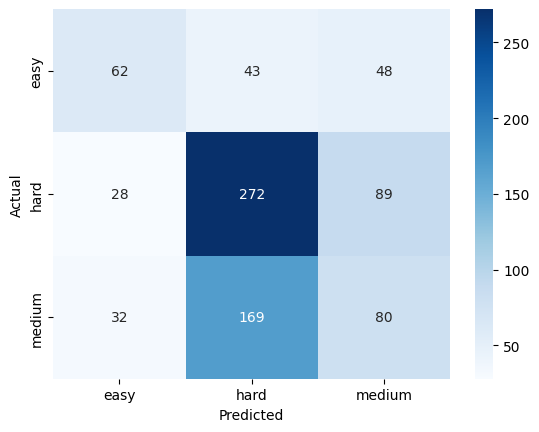

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cls, svm_cpred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train, y_train_cls)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [34]:
from sklearn.metrics import accuracy_score

rf_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test_cls, rf_pred))

Random Forest Accuracy: 0.543134872417983


##### Visualization of separation between difficulty levels

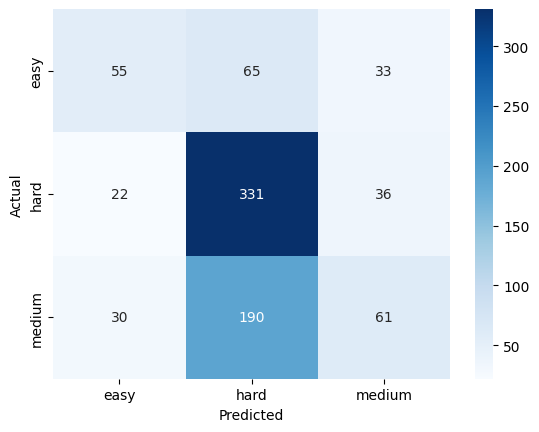

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cls, rf_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
import joblib

joblib.dump(rf_clf, "../models/classification_model.pkl")
joblib.dump(label_encoder, "../models/label_encoder.pkl")

['../models/label_encoder.pkl']

#### From the above results, we can say that Random Forest has turned to be the best model for classification purpose.

In [37]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_cls, y_pred_cls, average="macro")
print("Macro F1:", f1)

Macro F1: 0.461594911521702


### MODEL 2 — DIFFICULTY SCORE REGRESSION

For regression, we will implement SVD to improve results because of sparse data. We didn't implement SVD for classifier because of RF is already giving better results for it.

In [38]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
X_tfidf_svd = svd.fit_transform(X_tfidf)

X_regression = np.hstack([X_tfidf_svd, X_complexity_scaled])
X_regression.shape

(4112, 317)

In [39]:
joblib.dump(svd, "../models/svd.pkl")

['../models/svd.pkl']

#### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_cls, y_test_cls, y_train_reg, y_test_reg = train_test_split(
    X_regression,
    y_class,
    y_score,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

#### Baseline Model: Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train_reg)

y_pred_lr = lr.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test_reg, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lr)))

Linear Regression MAE: 1.6983162897512976
Linear Regression RMSE: 2.0643222726373636


Data is not linear which poses problems for Linear regression leading to great margins of error.

#### Ridge Regression (to compensate for Linear regression results)

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

ridge = Ridge(alpha=10)   # regularization strength
ridge.fit(X_train, y_train_reg)

y_pred_ridge = ridge.predict(X_test)

print("Ridge MAE:", mean_absolute_error(y_test_reg, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge)))

Ridge MAE: 1.7162924754613702
Ridge RMSE: 2.037557915750232


##### Here, Regularization is important.

In [43]:
for a in [0.1, 1, 10, 50, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train_reg)
    y_pred_tune = ridge.predict(X_test)
    print(a, mean_absolute_error(y_test_reg, y_pred_tune), np.sqrt(mean_squared_error(y_test_reg, y_pred_tune)))

0.1 1.694808311429045 2.058109189914129
1 1.6840805135846324 2.0274076896366604
10 1.7162924754613702 2.037557915750232
50 1.7726469761452772 2.0940273238381897
100 1.7884466245691908 2.1108136909446644


On tuning, find that alpha=10 gives best results since rmse penalizes large errors.

#### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train, y_train_reg)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [45]:
y_pred_rf = rf_reg.predict(X_test)

print("RF MAE:", mean_absolute_error(y_test_reg, y_pred_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)))

RF MAE: 1.7267970838396112
RF RMSE: 2.0453645404708882


#### Gradient Boosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train_reg)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",300
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft

In [47]:
y_pred_gbr = gbr.predict(X_test)

print("GBR MAE:", mean_absolute_error(y_test_reg, y_pred_gbr))
print("GBR RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_gbr)))

GBR MAE: 1.684499507293645
GBR RMSE: 2.019430285400569


In [48]:
models = {
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gbr
}

comparison_data = []

for model_name, y_pred in models.items():
    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    comparison_data.append([model_name, mae, rmse])

# Create comparison table
comparison_df = pd.DataFrame(comparison_data, columns=['Model', 'MAE', 'RMSE'])

# Format for better readability
comparison_df['MAE'] = comparison_df['MAE'].round(3)
comparison_df['RMSE'] = comparison_df['RMSE'].round(3)

print("Model Performance Comparison")
print("="*50)
print(comparison_df.to_string(index=False))
print("="*50)

# Find best model
best_model_mae = comparison_df.loc[comparison_df['MAE'].idxmin(), 'Model']
best_model_rmse = comparison_df.loc[comparison_df['RMSE'].idxmin(), 'Model']
print(f"\nBest model by MAE: {best_model_mae}")
print(f"Best model by RMSE: {best_model_rmse}")

Model Performance Comparison
            Model   MAE  RMSE
Linear Regression 1.698 2.064
 Ridge Regression 1.716 2.038
    Random Forest 1.727 2.045
Gradient Boosting 1.684 2.019

Best model by MAE: Gradient Boosting
Best model by RMSE: Gradient Boosting


In [49]:
import joblib

joblib.dump(gbr, "../models/regression_model.pkl")
joblib.dump(tfidf_vectorizer, "../models/vectorizer.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']